In [1]:
import librosa
import librosa.display as ipd
import IPython.display as ipd
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore') # Librosa's specshow gives warnings about a matplotlib deprecation thing

# Loading audio files with librosa

In [2]:
bird='XC6671.wav'

In [3]:
ipd.Audio(bird)

# Plot the signal

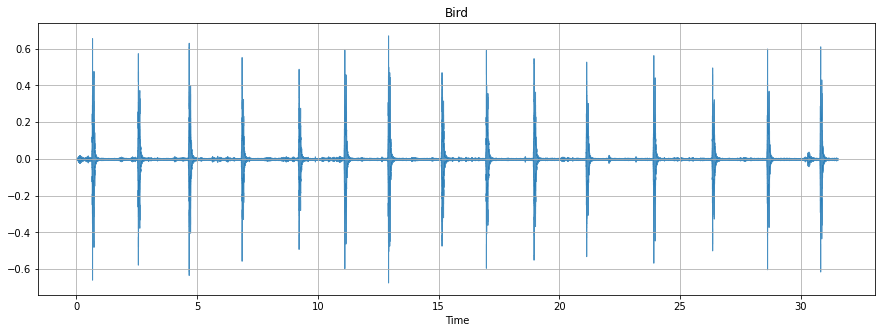

In [4]:
x, sr = librosa.load(bird)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sr, alpha=0.8)
plt.title('Bird')
plt.grid()

In [5]:
#load audio files with librosa
chunk, rate = librosa.load(bird, sr=32000, offset=3, duration=5)

# Extracting Mel Spectrogram

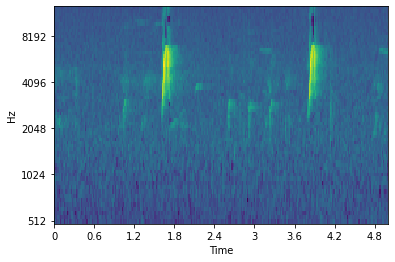

In [6]:
import numpy as np
import pandas as pd
def chunk_to_spec(chunk, SPEC_HEIGHT=64,SPEC_WIDTH=256, rate=32000, FMIN=500, FMAX=12500):
    mel_spec = librosa.feature.melspectrogram(y=chunk, 
                                              sr=32000, 
                                              n_fft=1024, 
                                              hop_length=int(32000 * 5 / (SPEC_WIDTH - 1)), 
                                              n_mels=SPEC_HEIGHT, 
                                              fmin=FMIN, 
                                              fmax=FMAX)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

def display_spec(spec, SPEC_HEIGHT=64,SPEC_WIDTH=256, rate=32000, FMIN=500, FMAX=12500):
    librosa.display.specshow(spec, 
                             sr=32000, 
                             hop_length=int(32000 * 5 / (SPEC_WIDTH - 1)), 
                             x_axis='time', 
                             y_axis='mel',
                             fmin=FMIN, 
                             fmax=FMAX, 
                             cmap=plt.get_cmap('viridis'))
    
spec = chunk_to_spec(chunk)
display_spec(spec) # Will give axis labels in Hs and time

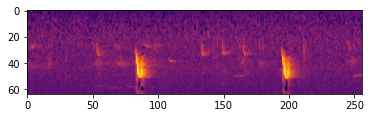

In [7]:
plt.imshow(spec, cmap='inferno') # Simple and compact

# SPECTROGRAM

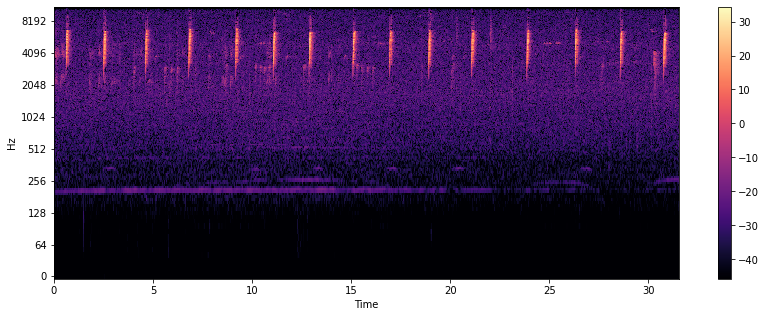

In [8]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# CENTROID OF WAVE,SPECTRAL ROLLOFF,SPECTRAL BANDWIDTH

In [9]:
import scipy
def spec_plot(y, sr, FMIN=500, FMAX=12500):
    # PCEN spec
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    melspec = librosa.feature.melspectrogram(y, sr=sr,
        fmin=FMIN, fmax=FMAX, n_mels=64)
    pcen = librosa.core.pcen(melspec, sr=sr,
        gain=0.8, bias=10, power=0.25, time_constant=0.06, eps=1e-06)
    librosa.display.specshow(pcen, sr=sr,
        fmin=FMIN, fmax=FMAX,
        x_axis='time', y_axis='mel', cmap='magma_r')
    # plt.title('PCEN-based SNR')
    plt.tight_layout()

    # SNR and a smoothed SNR with kernel 15
    plt.subplot(3, 1, 1)
    pcen_snr = np.max(pcen,axis=0) - np.min(pcen,axis=0)
    pcen_snr = librosa.power_to_db(pcen_snr / np.median(pcen_snr))
    median_pcen_snr = scipy.signal.medfilt(pcen_snr, kernel_size=15)
    times = np.linspace(0, len(y)/sr, num=melspec.shape[1])
    plt.plot(times, pcen_snr, color="orange")
    plt.plot(times, median_pcen_snr, color="blue")
    plt.xlim(times[0], times[-1])
    plt.ylim(0, 10)
    # And go through, picking some peaks
    for i in range(12):
        t_peak = np.argmax(median_pcen_snr)
        plt.scatter(times[t_peak], median_pcen_snr[t_peak], c='red', zorder=100)
        median_pcen_snr[t_peak-50:t_peak+50] = 0 # zero out around the peak to find the next one

    # Kernel 55 for even smoother (bad idea?)
    plt.subplot(3, 1, 3)
    median_pcen_snr = scipy.signal.medfilt(pcen_snr, kernel_size=55)
    times = np.linspace(0, len(y)/sr, num=melspec.shape[1])
    plt.plot(times, median_pcen_snr, color="blue")
    plt.xlim(times[0], times[-1])
    plt.ylim(0, 10)
    # And go through, picking some peaks
    for i in range(12):
        t_peak = np.argmax(median_pcen_snr)
        plt.scatter(times[t_peak], median_pcen_snr[t_peak], c='red', zorder=100)
        median_pcen_snr[t_peak-50:t_peak+50] = 0 # zero out around the peak to find the next one

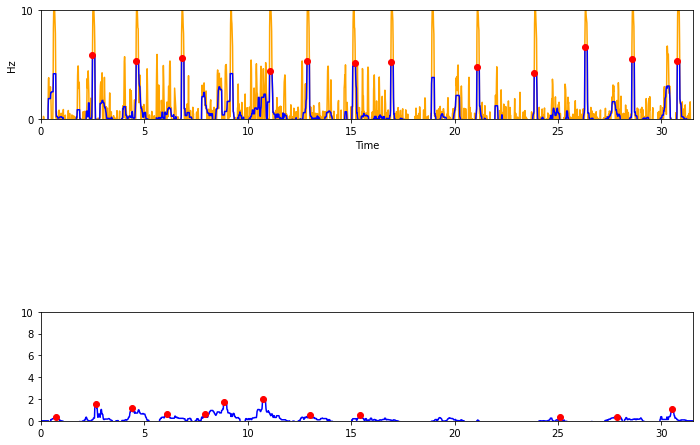

In [10]:
y, sr = librosa.load(bird, sr=32000) # A whole recording
spec_plot(y, sr)

In [11]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)
spectral_centroids.shape

(1, 1358)

In [12]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [13]:
import sklearn
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)

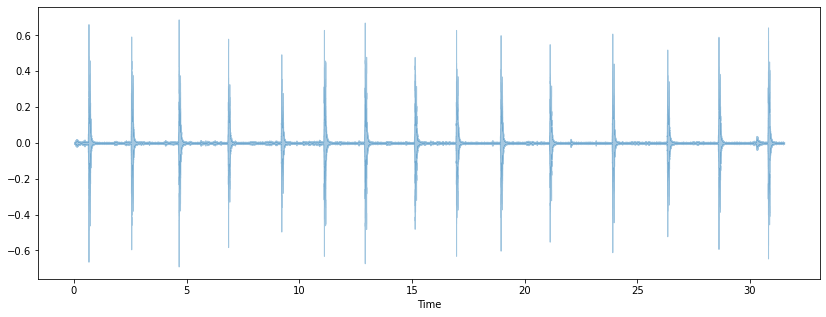

In [14]:
plt.rcParams['figure.figsize'] = (14, 5)
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes
librosa.display.waveshow(y, sr=sr, alpha=0.4)

# Mel filter banks

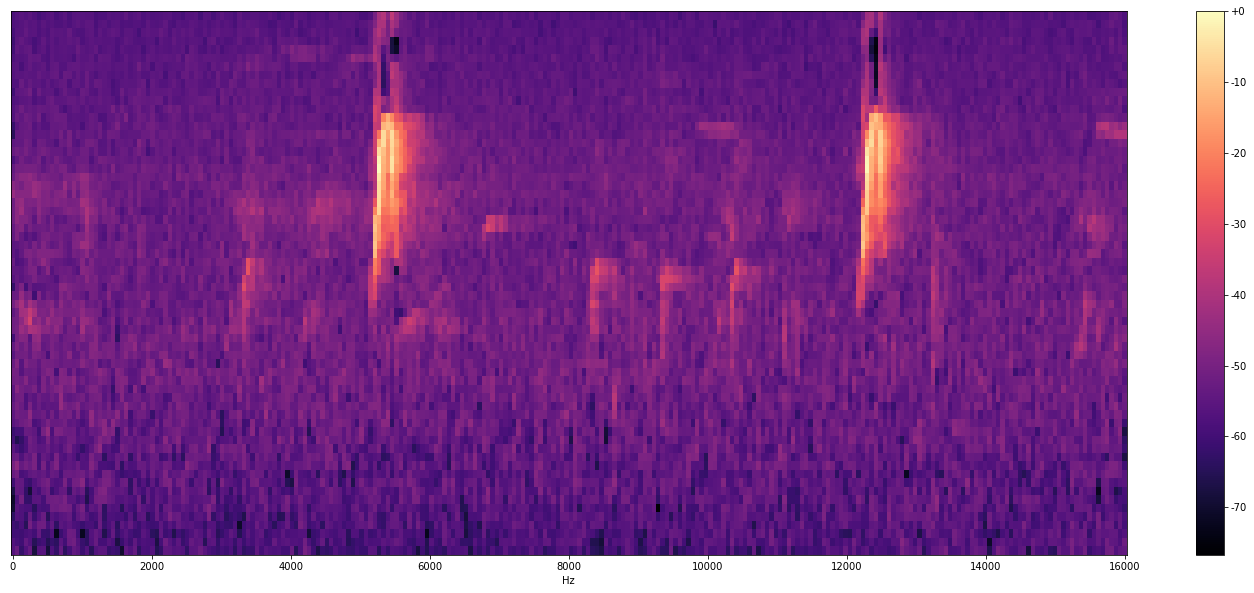

In [15]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(spec, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

In [16]:
spec.shape

(64, 256)

In [17]:
chunk
SPEC_HEIGHT=64
SPEC_WIDTH=256
rate=32000
FMIN=500
FMAX=12500
mel_spec = librosa.feature.melspectrogram(y=chunk, 
                                              sr=32000, 
                                              n_fft=1024, 
                                              hop_length=int(32000 * 5 / (SPEC_WIDTH - 1)), 
                                              n_mels=SPEC_HEIGHT, 
                                              fmin=FMIN, 
                                              fmax=FMAX)

In [18]:
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

In [19]:
mel_spec.shape

(64, 256)

In [20]:
log_mel_spectrogram = librosa.power_to_db(mel_spec)

In [21]:
log_mel_spectrogram.shape

(64, 256)

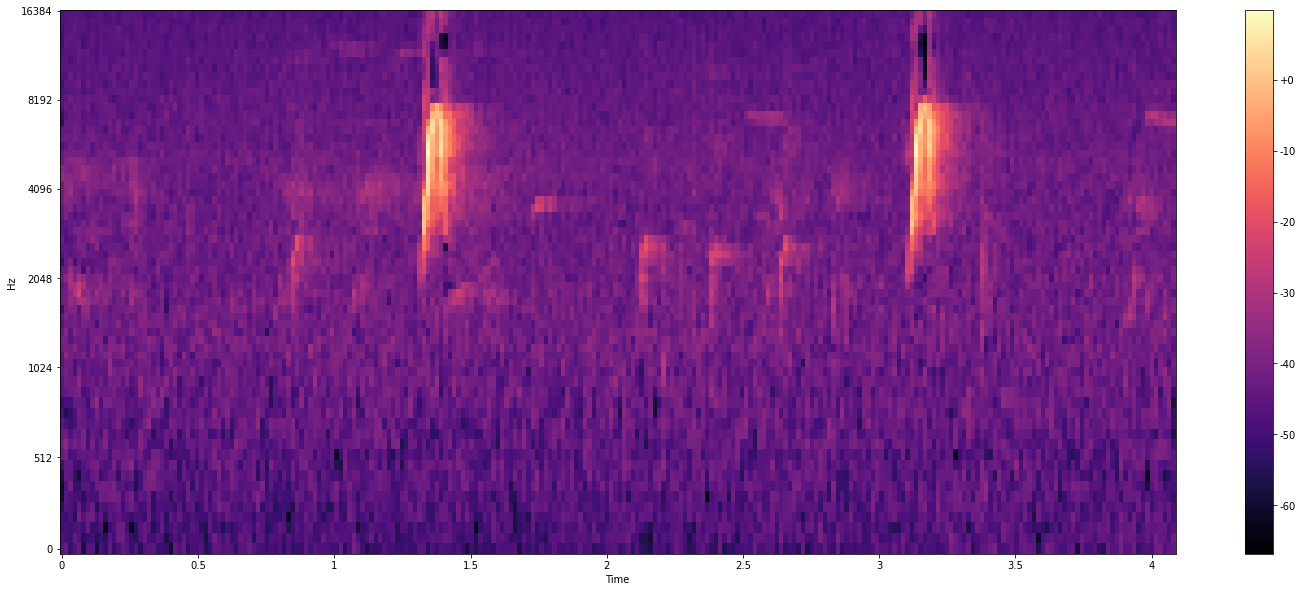

In [22]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()